## Observations and Insights

Capomulin is a promising drug candidate for this kind of tumor and warrants further investigation from this clinical trial's data analysis results.
Capomulin also had the most number of mice complete the study.



In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
cmpD = pd.merge(mouse_metadata, study_results,on='Mouse ID',how='left')

In [9]:
## Summary statistics
# enable display of all columns and rows:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

print(cmpD.head())
print()

#Check g989 to see if its listed for more than one drug
study_data_mice = mouse_metadata.set_index('Mouse ID')
mouse = study_data_mice.loc['g989', :]
print('check g989 to see if its listed for more than one drug: ')
print(mouse.head())
print()

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  

check g989 to see if its listed for more than one drug: 
Drug Regimen    Propriva
Sex               Female
Age_months            21
Weight (g)            26
Name: g989, dtype: object



In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
print('Summary stats: ')
tumor_sump= cmpD.groupby("Drug Regimen").agg(['mean', 'median','var','std','sem'])["Tumor Volume (mm3)"]
print(tumor_sump.head())
print()


Summary stats: 
                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466



## Bar plots

ptsByRegimen: 
              Mouse ID  Sex  Age_months  Weight (g)  Timepoint  \
Drug Regimen                                                     
Capomulin          230  230         230         230        230   
Ceftamin           178  178         178         178        178   
Infubinol          178  178         178         178        178   
Ketapril           188  188         188         188        188   
Naftisol           186  186         186         186        186   

              Tumor Volume (mm3)  Metastatic Sites  
Drug Regimen                                        
Capomulin                    230               230  
Ceftamin                     178               178  
Infubinol                    178               178  
Ketapril                     188               188  
Naftisol                     186               186  




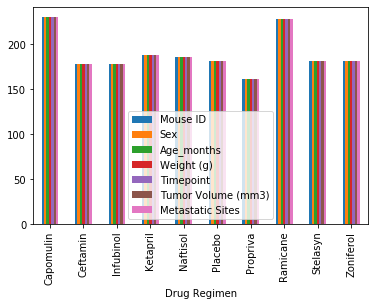

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
ptsByRegimen = pd.DataFrame(cmpD.groupby('Drug Regimen').count())
print('ptsByRegimen: ')
print(ptsByRegimen.head())
print()
print()
ptsByRegimen.plot(kind='bar')


Text(0, 0.5, 'Data Points')

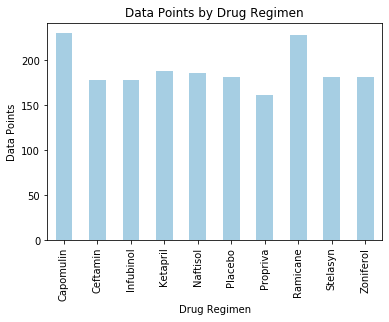

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
ptsByRegimen = cmpD.groupby('Drug Regimen').size()
ax = ptsByRegimen.plot(kind='bar', lw=2, colormap='Paired', title='Data Points by Drug Regimen')
#ax.set_xlabel("x label")
ax.set_ylabel("Data Points")
#ax.show()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender= cmpD.groupby('Sex').size()


print('head: ') 
print(mouse_gender.head(20))
print()
print('tail: ')
print(mouse_gender.tail(20))
print()



head: 
Sex
Female    935
Male      958
dtype: int64

tail: 
Sex
Female    935
Male      958
dtype: int64



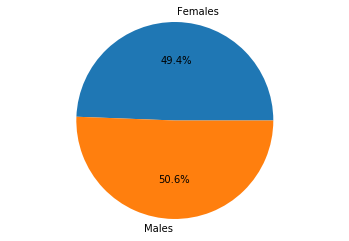

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = 'Females', 'Males'

explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(mouse_gender, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



## Quartiles, outliers and boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_volume4 = cmpD[['Drug Regimen','Tumor Volume (mm3)']]


# Preview DataFrame
print()
print(tumor_volume4.head())
print()


tumor_volume4 = tumor_volume4.sort_values('Tumor Volume (mm3)')
# Preview DataFrame
print()
print(tumor_volume4.head())
print()


tumor_volume4 = tumor_volume4.sort_values('Drug Regimen')
# Preview DataFrame
print()
print(tumor_volume4.head())
print()



  Drug Regimen  Tumor Volume (mm3)
0     Ramicane           45.000000
1     Ramicane           38.825898
2     Ramicane           35.014271
3     Ramicane           34.223992
4     Ramicane           32.997729


   Drug Regimen  Tumor Volume (mm3)
9      Ramicane           22.050126
19    Capomulin           23.343598
8      Ramicane           24.365505
18    Capomulin           25.472143
7      Ramicane           26.546993


    Drug Regimen  Tumor Volume (mm3)
373    Capomulin           46.759074
139    Capomulin           38.909349
299    Capomulin           38.939633
242    Capomulin           38.954115
309    Capomulin           38.982878



In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and scatter plots

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [22]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen